<a href="https://colab.research.google.com/github/saakethj/Apparel-Classifier/blob/master/Apparel_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apparel Classifier**
Apparel Classifier is an artificial neural network model that classifies grayscale images of size (28X28)pixels and provides which category of clothing is like shirts, T-shirts, Handbags e.tc.

The fashion dataset used in this neural network has ***10,714*** images of clothing.

This Artificial Neural Network uses `tf.keras` api to build, train and testing the model

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Load dataset
Upload the dataset from local files and load.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test images.npz to Test images (1).npz
Saving Test labels.npz to Test labels (1).npz
Saving Train images.npz to Train images (1).npz
Saving Train labels.npz to Train labels (1).npz


In [ ]:
train_images = np.load('Train images.npz')['X_train']
train_labels = np.load('Train labels.npz')['Y_train']
test_images = np.load('Test images (1).npz')['X_test']
test_labels = np.load('Test labels.npz')['Y_test']

Loaded data set is in the form of **NumPy arrays**:


*   The *train_image*s and *train_labels* are used in training the model.
*   To test the model *test_images* and *test_labels* are used.

The **images** are NumPy arrays containing pixel values ranging from 0-255.
The **labels** are of integer datatype. They correspond to the category of the image.



<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Footwear</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Handdbags</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Shirts</td>
  </tr>
    <tr>
    <td>3</td>
    <td>T-shirts</td>
  </tr>
<table>

Create a list containing category names of clothing which can be used to visualize the dataset.




In [ ]:
category_names = ['Footwear', 'Handbags', 'Shirts', 'T-shirts']

##**Dimensions and length of Train and Test dataset**


The Train dataset has total of 7,400 images and stored in 2-D array with pixel values each ranging from 0-255. The train labels are of length same as train images.

The Test datset has total of 3314 images with corresponding labels.

In [ ]:
print(f'Shape of the train images, train labels: {train_images.shape, train_labels.shape}')

Shape of the train images, train labels: ((7400, 28, 28), (7400,))


In [ ]:
print(f'Shape of the test images: {test_images.shape, test_labels.shape}')

Shape of the test images: ((3314, 28, 28), (3314,))


In [ ]:
train_images[0]

In [ ]:
train_labels

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
train_images.dtype

dtype('float64')

In [ ]:
train_labels.dtype

dtype('int64')

##**Visualization of *Train* and *Test* images.**






Load any image from the Train or Test dataset, we can observe that the pixel values falls in range from **0-255**

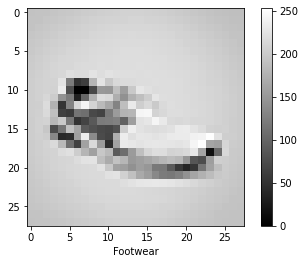

In [ ]:
plt.figure()
plt.imshow(train_images[237], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(category_names[train_labels[237]])
plt.show()

## Create a Model

Create a model to train and compile the model

Before creating layers and feeding the datset scale the pixel values <br> lies in between **0** to **1** which makes the model easy to calculate. 

In [ ]:
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

In [ ]:
# we can see the values are scaled in between 0 and 1
print(f'Pixel values of train images: \n\n {train_images[0]}')

### Creating Layers

In [ ]:
from tensorflow import  keras
from tensorflow.keras import  layers
from keras.layers import  Dense, Flatten, Dropout

In [ ]:
model = keras.Sequential(
    [
     Flatten(input_shape=(28, 28)),
     # Flatten 28, 28 into single layer having 784 neurons
     Dense(15, activation='relu', name='layer1'),
     #Dense(4, activation='relu', name='layer2'),
     Dense(4) # output layer having exact number neurons as target outputs
    ]
)


In [ ]:
print('Summary of the Model: \n')
model.summary()

Summary of the Model: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 15)                11775     
                                                                 
 dense (Dense)               (None, 4)                 64        
                                                                 
Total params: 11,839
Trainable params: 11,839
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights # Shows us the weights associated with each neuron

In [ ]:
# compile model 
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

## Training the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
232/232 [==============================] - 1s 2ms/step - loss: 0.8984 - accuracy: 0.6858
Epoch 2/10
232/232 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.8282
Epoch 3/10
232/232 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8438
Epoch 4/10
232/232 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8564
Epoch 5/10
232/232 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8661
Epoch 6/10
232/232 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8765
Epoch 7/10
232/232 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8791
Epoch 8/10
232/232 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.8818
Epoch 9/10
232/232 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.8868
Epoch 10/10
232/232 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8909

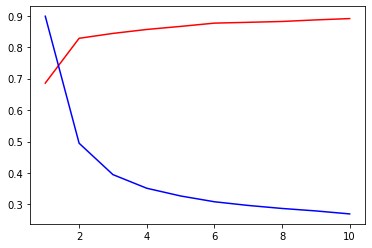

In [ ]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
epochs = range(1, 11)
plt.plot(epochs, train_accuracy, 'r')
plt.plot(epochs, train_loss, 'b')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

104/104 - 0s - loss: 0.3242 - accuracy: 0.8518 - 252ms/epoch - 2ms/step

Test accuracy: 0.8518406748771667


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[237]

array([0.7359093 , 0.0315633 , 0.02790763, 0.20461982], dtype=float32)

In [ ]:
np.argmax(predictions[237])

0

In [ ]:
test_labels[237]

0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(category_names[predicted_label],
                                100*np.max(predictions_array),
                                category_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

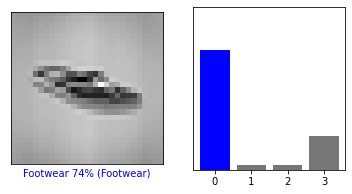

In [ ]:
i = 237
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

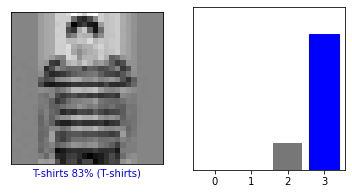

In [ ]:
i = 2500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
img = test_images[2580]

print(img.shape)


(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.2925471e-03 1.7207749e-04 2.9152378e-01 7.0501161e-01]]


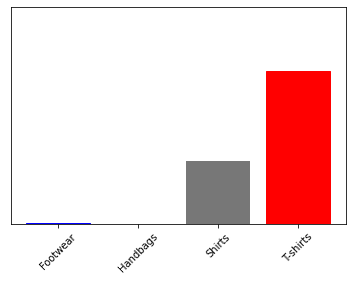

In [ ]:
plot_value_array(3, predictions_single[0], test_labels)
_ = plt.xticks(range(4), category_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

3